In [61]:
# Import SQL Alchemy engine
from sqlalchemy import create_engine

# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [62]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

In [63]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df_education = pd.read_sql_query('select * from useducation',con=engine)
engine.dispose()

1. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?
2. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.
3. Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.
4. Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.
5. Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?
6. If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?

In [64]:
# Filling n/a dataset first. Used from the Module 15-3 Data Cleaning 2

df_education_2 = df_education.copy()

fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE", 
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE", 
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G", 
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G", 
             "GRADES_9_12_G", "GRADES_ALL_G"]

for col in fill_list:
    df_education_2.loc[:, col] = df_education_2.loc[:, col].fillna(df_education_2.loc[:, col].mean())
    print(col)

# Dropping n/a
df_education_2.dropna(inplace=True)

ENROLL
TOTAL_REVENUE
FEDERAL_REVENUE
STATE_REVENUE
LOCAL_REVENUE
TOTAL_EXPENDITURE
INSTRUCTION_EXPENDITURE
SUPPORT_SERVICES_EXPENDITURE
OTHER_EXPENDITURE
CAPITAL_OUTLAY_EXPENDITURE
GRADES_PK_G
GRADES_KG_G
GRADES_4_G
GRADES_8_G
GRADES_12_G
GRADES_1_8_G
GRADES_9_12_G
GRADES_ALL_G


1. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

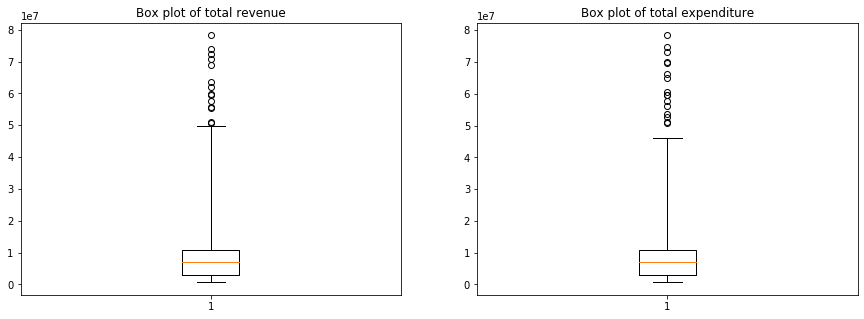

In [65]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(df_education_2["TOTAL_REVENUE"], whis = 5)
plt.title("Box plot of total revenue")

plt.subplot(1,2,2)
plt.boxplot(df_education_2["TOTAL_EXPENDITURE"], whis = 5)
plt.title("Box plot of total expenditure")
plt.show()

# Yes, they seem to have outliers above 5

2. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

In [66]:
from scipy.stats.mstats import winsorize

# winsorizing outlier data for both columns
winsorized_revenue = winsorize(df_education_2["TOTAL_REVENUE"], (0, 0.05))

winsorized_expenditure = winsorize(df_education_2["TOTAL_EXPENDITURE"], (0, 0.05))

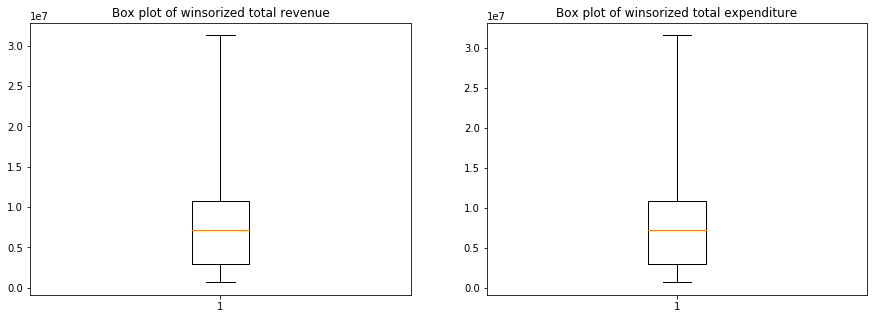

In [67]:
# Re-running plots to see if outliers still exist
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(winsorized_revenue, whis = 5)
plt.title("Box plot of winsorized total revenue")

plt.subplot(1,2,2)
plt.boxplot(winsorized_expenditure, whis = 5)
plt.title("Box plot of winsorized total expenditure")
plt.show()

3. Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.

In [68]:
# subtracing total expenditure from total revenue to determine budget deficit
deficit = df_education_2.TOTAL_REVENUE - df_education_2.TOTAL_EXPENDITURE
deficit.head()

2   -143501.0
3    -31063.0
5    -79653.0
6    112964.0
7      6449.0
dtype: float64

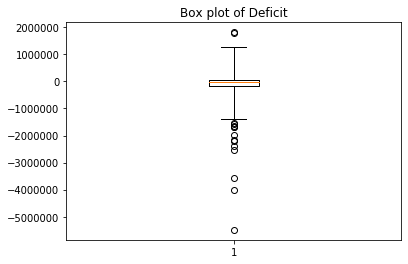

In [69]:
plt.boxplot(deficit, whis = 5)
plt.title("Box plot of Deficit")

plt.show()

# There are definitely outliers above and below the trend.

In [70]:
# using winsorize with the 0.05 and 0.95
winsorized_deficit = winsorize(deficit, (0.05, 0.05))

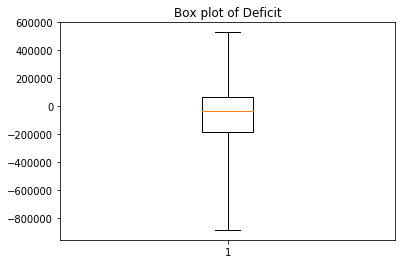

In [71]:
plt.boxplot(winsorized_deficit, whis = 5)
plt.title("Box plot of Deficit")
plt.show()

# Outliers are now gone!

4. Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

In [49]:
deficit_2 = winsorized_revenue - winsorized_expenditure

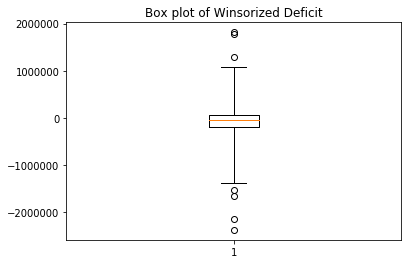

In [53]:
plt.boxplot(deficit_2, whis = 5)
plt.title("Box plot of Winsorized Deficit")
plt.show()

# Yes, there are outliers.

In [54]:
winsorized_budget_2 = winsorize(deficit_2, (0.05, 0.05))

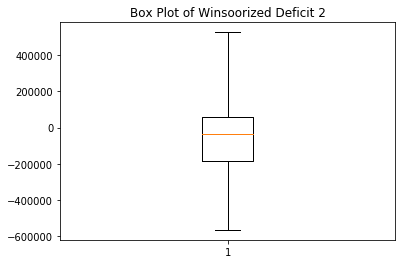

In [56]:
plt.boxplot(winsorized_budget_2, whis = 5)
plt.title("Box Plot of Winsorized Deficit 2")
plt.show()

# outliers are now gone!

5. Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?

In [59]:
pd.DataFrame({"original_budget": deficit, "winsorized_budget1": winsorized_deficit,
              "winsorized_budget2": winsorized_budget_2}).describe()

,original_budget,winsorized_budget1,winsorized_budget2
count,4.740000e+02,474.000000,474.000000
mean,-1.047719e+05,-73487.581262,-46067.933582
std,5.629064e+05,313288.034770,247492.058383
min,-5.487742e+06,-882032.000000,-563852.000000
25%,-1.802140e+05,-180214.000000,-183985.250000
50%,-3.170850e+04,-31708.500000,-32939.500000
75%,6.403075e+04,64030.750000,57965.250000
max,1.816932e+06,530090.000000,525512.000000


In [60]:
# all relevent statistics vary significantly due to the amount of data cleaning.

6. If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?

I would probably default to the first method from question 3. In this method, the difference is created from 2 related columns. If the data was winsorized before making the difference column, then there's no telling what the raw data is pointing to.
In reality, both methods might be considered and compared. Based on the results and collaboration with the subject matter expert, the method may vary.